<h3 style="text-align: center;"><b>Implementing Polynomial Regression From Scratch</b></h3>
<h5 style="text-align: center;">This notebook follows the intuition from GeeksforGeeks <a href="https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/">https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/</a> as well as the tutorial from <a href="https://rickwierenga.com/blog/ml-fundamentals/polynomial-regression.html" target="_blank">https://rickwierenga.com/blog/ml-fundamentals/polynomial-regression.html</a></h5>
<h5 style="text-align: center;">We explored linear regression simply being y = &alpha;x + &beta;. However, this is only for linear relationships of data. There are relationships between dependent and independent variables that are non- linear so we can use polynomial regression. </h5>
$$ \text{The generel form of polynomial regression can be modeled like this: } h_\theta(x) = \theta^T = \theta_0 +\theta_1x + \theta_2x^2 + ... + \theta_nx^n $$
<h5 style="text-align: center;">To find the best coefficients we use:</h5>
$$ \vec{\theta} = (X^TX)^{-1}X^TY $$
<h5 style="text-align: center;">This is rather inefficient though so using gradient descent usually Mean Squared Error is the best course of action</h5>
<h5 style="text-align: center;">Gradient descent</h5>
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x^i) - y^i)^2 $$

<h5 style="text-align: center">The h_&theta;(x) can be implemented in code like:</h5>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def h(X, theta):
    return np.dot(X, theta)

<h5 style="text-align: center;">The Gradiant is Calculated as Before</h5>

10 1
(10,)


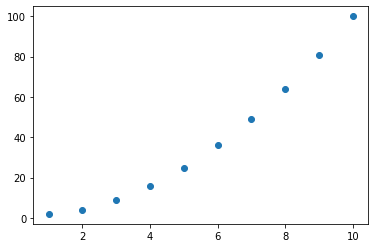

In [3]:
X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
y = np.array([2, 4, 9, 16, 25, 36, 49, 64, 81, 100])
m, n = X.shape
print(m, n)
print(y.shape)
plt.scatter(X, y)

In [4]:
ones = np.ones((m, 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [5]:
"""
This just adds the array of 1s to X
https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
"""
X = np.hstack((ones, X))
print(X)
X.shape

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


(10, 2)

In [6]:
"""
For degree = 3 polynomials 
"""
print(X[:, 1]**2)
print((X[:, 1]**2).reshape((m, 1)))
X = np.hstack((
    X,
    (X[:, 1] ** 2).reshape((m, 1)),
    (X[:, 1] ** 3).reshape((m, 1)),
    (X[:, 1] ** 4).reshape((m, 1))
))
print(X.shape)
m, n = X.shape

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
[[  1.]
 [  4.]
 [  9.]
 [ 16.]
 [ 25.]
 [ 36.]
 [ 49.]
 [ 64.]
 [ 81.]
 [100.]]
(10, 5)


In [7]:
def grad(x, Y, epochs=50):
    alpha = 0.01
    theta = np.random.random(n)
    for _ in range(epochs):
        theta = theta - alpha * (1/m) * np.dot(x.T, (np.dot(x, theta) - Y))
        #theta = theta - alpha * (1/m) * (x.T @ ((x @ theta) - Y))
        print(theta)
    return theta

In [8]:
theta = grad(X, y, 10)
prediction = h(X, theta)
print(prediction)
print(y)

[-1.28705630e+01 -1.18854222e+02 -1.06529750e+03 -9.72163307e+03
 -9.00931951e+04]
[2.31214317e+06 2.01442611e+07 1.80413919e+08 1.64838538e+09
 1.52892690e+10]
[-3.92377696e+11 -3.41854487e+12 -3.06168228e+13 -2.79736364e+14
 -2.59463913e+15]
[6.65877826e+16 5.80138282e+17 5.19577530e+18 4.74721790e+19
 4.40318775e+20]
[-1.13001652e+22 -9.84513702e+22 -8.81740119e+23 -8.05618456e+24
 -7.47235410e+25]
[1.91767512e+27 1.67075206e+28 1.49634192e+29 1.36716096e+30
 1.26808301e+31]
[-3.25435761e+32 -2.83532108e+33 -2.53934134e+34 -2.32011701e+35
 -2.15197849e+36]
[5.52275166e+37 4.81163291e+38 4.30934558e+39 3.93731470e+40
 3.65197811e+41]
[-9.37229080e+42 -8.16549895e+43 -7.31310087e+44 -6.68175226e+45
 -6.19752670e+46]
[1.59050851e+48 1.38571197e+49 1.24105722e+50 1.13391529e+51
 1.05174062e+52]
[1.17908748e+52 1.77875549e+53 8.83685727e+53 2.76706927e+54
 6.71829180e+54 1.38800367e+55 2.56474050e+55 4.36679156e+55
 6.98415051e+55 1.06320528e+56]
[  2   4   9  16  25  36  49  64  81 100]

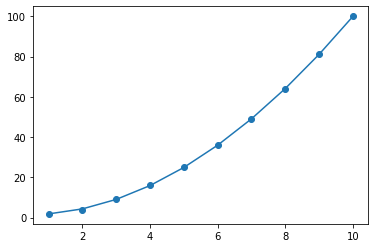

In [14]:
"""
Now for practical usage
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
y = np.array([2, 4, 9, 16, 25, 36, 49, 64, 81, 100])

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.scatter(X, y);
plt.plot(X, y_pred);